In [1]:
# load some data to practice regressions
import seaborn as sns
import numpy as np
diamonds = sns.load_dataset('diamonds')

# this alteration is not strictly necessary to practice a regression
# but we use this in livecoding
diamonds2 = (diamonds.query('carat < 2.5')               # censor/remove outliers
            .assign(lprice = np.log(diamonds['price']))  # log transform price
            .assign(lcarat = np.log(diamonds['carat']))  # log transform carats
            .assign(ideal = diamonds['cut'] == 'Ideal') 
             
             # some regression packages want you to explicitly provide 
             # a variable for the constant
            .assign(const = 1)                           
            )  

In [6]:
import statsmodels.api as sm  

y = diamonds2['lprice']
X = diamonds2[['const','lcarat']]

model1 = sm.OLS(y,X)                # pick model type and specify model features
results1 = model1.fit()             # estimate / fit
print(results1.summary())           # view results 
diamonds2['lprice_predicted1'] = results1.predict()   # get the predicted results
diamonds2['residuals1'] = results1.resid        # get the residuals

diamonds2['price_predicted1'] = np.exp(diamonds2['lprice_predicted1'])

#residuals1 = y - y_predicted1      # another way to get the residuals

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 7.542e+05
Date:                Tue, 24 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:48:14   Log-Likelihood:                -4073.2
No. Observations:               53797   AIC:                             8150.
Df Residuals:                   53795   BIC:                             8168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4525      0.001   6193.432      0.0

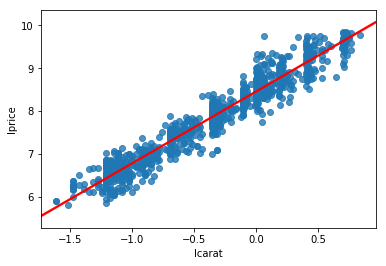

In [7]:
sns.regplot(data=diamonds2.sample(1000),x='lcarat',y='lprice',line_kws={'color':'red'})

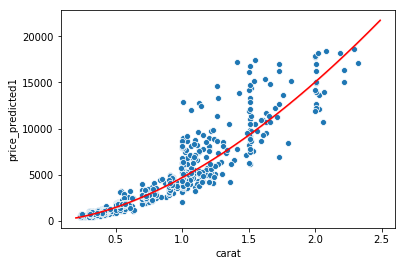

In [8]:
sns.scatterplot(data=diamonds2.sample(700),x='carat',y='price')
sns.lineplot(data=diamonds2, x='carat',y='price_predicted1', color='red')

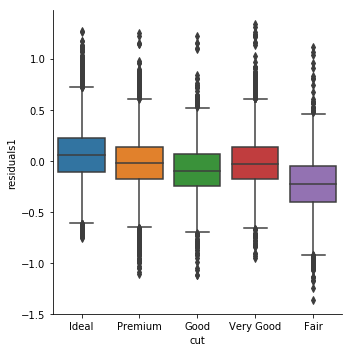

In [9]:
sns.catplot(data=diamonds2,x='cut',y='residuals1',kind='box')

### Prof's fave regression

In [10]:
from statsmodels.formula.api import ols as sm_ols

model2   = sm_ols('lprice ~ lcarat',  # specify model (you don't need to include the constant!)
                  data=diamonds2)
results2 = model2.fit()               # estimate / fit
print(results2.summary())             # view results ... identical to before

# the prediction and residual and plotting are the exact same

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 7.542e+05
Date:                Tue, 24 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:51:13   Log-Likelihood:                -4073.2
No. Observations:               53797   AIC:                             8150.
Df Residuals:                   53795   BIC:                             8168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.4525      0.001   6193.432      0.0

In [11]:
sm_ols('lprice ~ lcarat + ideal', data=diamonds2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 3.914e+05
Date:                Tue, 24 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:57:35   Log-Likelihood:                -3136.4
No. Observations:               53797   AIC:                             6279.
Df Residuals:                   53794   BIC:                             6306.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.4182      0.002   5415.779      0.000       8.415       8.421
ideal[T.True]     0.1000      0.002     43.662      0.000       0.096       0.105
lcarat            1.6963      0.002    878.286      0.000       1.692       1.700
==============================================================================
Omnibus:                      794.680   Durbin-Watson:                   1.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1394.941
Skew:                           0.101   Prob(JB):                    1.24e-303
Kurtosis:                       3.763   Cond. No.                         2.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
sm_ols('lprice ~ lx',data=diamonds2.assign(lx=np.log(1+diamonds2['x']), ).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                 1.899e+05
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:10:51   Log-Likelihood:            -4.8120e+05
No. Observations:               53797   AIC:                         9.624e+05
Df Residuals:                   53795   BIC:                         9.624e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.405e+04     41.976   -334.776      0.000   -1.41e+04    -1.4e+04
x           3137.5607      7.201    435.734      0.000    3123.447    3151.674
==============================================================================
Omnibus:                    19264.496   Durbin-Watson:                   0.420
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           149991.817
Skew:                           1.516   Prob(JB):                         0.00
Kurtosis:                      10.598   Cond. No.                         31.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""